In [25]:
import torch
import torch.nn.functional as F
import kornia.color as K
import numpy as np

from hdr_mask import get_diff_mask
from torch.utils.data import DataLoader
import sys
import os
# 添加SAFNet根目录到Python路径
root_dir = '/root/code/hdr/SAFNet'
if root_dir not in sys.path:
    sys.path.append(root_dir)

# 然后再导入HDRDataset
from dataset.datasets import HDRDataset

val_dir = '/root/code/hdr/kata17'
val_dataset = HDRDataset(val_dir,patch_size=1,is_train=False)  
val_loader = DataLoader(val_dataset, batch_size=1,shuffle=False,drop_last=False)
# Get specific index from validation loader
for i, (imgs_lin, imgs_ldr, expos, img_hdr_gt) in enumerate(val_loader):
    print("Linear images shape:", [img.shape for img in imgs_lin])
    print("LDR images shape:", [img.shape for img in imgs_ldr]) 
    print("Exposures:", expos)
    print("HDR GT shape:", img_hdr_gt.shape)
    
    print("\nLinear images stats:")
    for idx, img in enumerate(imgs_lin):
        print(f"Image {idx}:")
        print(f"Min: {img.min():.4f}, Max: {img.max():.4f}")
        print(f"Mean: {img.mean():.4f}, Std: {img.std():.4f}")
    
    print("\nLDR images stats:")
    for idx, img in enumerate(imgs_ldr):
        print(f"Image {idx}:")
        print(f"Min: {img.min():.4f}, Max: {img.max():.4f}")
        print(f"Mean: {img.mean():.4f}, Std: {img.std():.4f}")
        
    print("\nHDR GT stats:")
    print(f"Min: {img_hdr_gt.min():.4f}, Max: {img_hdr_gt.max():.4f}")
    print(f"Mean: {img_hdr_gt.mean():.4f}, Std: {img_hdr_gt.std():.4f}")
    
    break  # Just print first batch

15
Linear images shape: [torch.Size([1, 3, 1000, 1500]), torch.Size([1, 3, 1000, 1500]), torch.Size([1, 3, 1000, 1500])]
LDR images shape: [torch.Size([1, 3, 1000, 1500]), torch.Size([1, 3, 1000, 1500]), torch.Size([1, 3, 1000, 1500])]
Exposures: tensor([[ 1.,  8., 64.]])
HDR GT shape: torch.Size([1, 3, 1000, 1500])

Linear images stats:
Image 0:
Min: 0.0000, Max: 1.0000
Mean: 0.0152, Std: 0.0231
Image 1:
Min: 0.0000, Max: 0.1250
Mean: 0.0136, Std: 0.0195
Image 2:
Min: 0.0001, Max: 0.0156
Mean: 0.0074, Std: 0.0063

LDR images stats:
Image 0:
Min: 0.0031, Max: 1.0000
Mean: 0.1170, Std: 0.0840
Image 1:
Min: 0.0144, Max: 1.0000
Mean: 0.2895, Std: 0.2013
Image 2:
Min: 0.0940, Max: 1.0000
Mean: 0.6304, Std: 0.3040

HDR GT stats:
Min: 0.0001, Max: 1.0000
Mean: 0.0140, Std: 0.0219


In [21]:
source, reference = get_test_image(index=8)

74


torch.Size([1, 3, 1000, 1000])


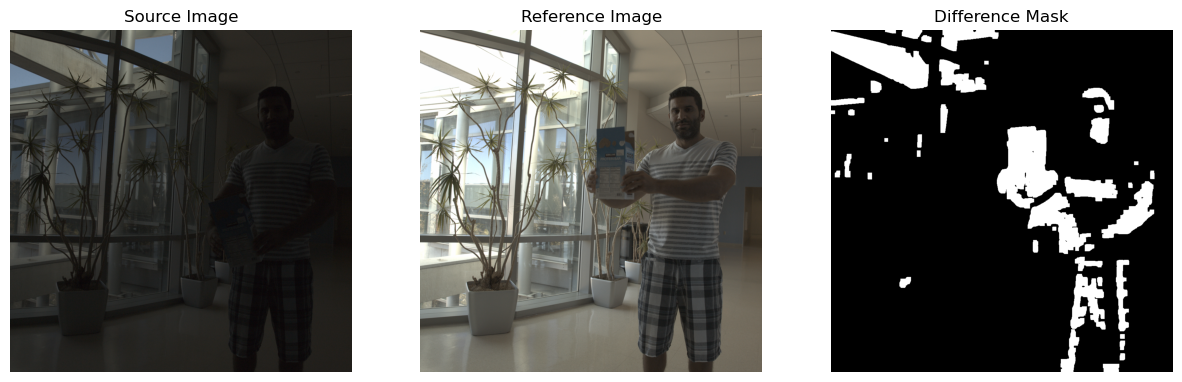

Mask ratio: 13.57%


In [22]:
import numpy as np
from PIL import Image



print(source.shape)
diff_mask = get_diff_mask(source, reference,
                          kernel_size=9,threshold=0.9,
                          eroded_kernel_size=11,
                          dilated_kernel_size=11,percentile=0.04)

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(source[0].permute(1,2,0).cpu().numpy())
plt.title('Source Image')
plt.axis('off')

plt.subplot(132) 
plt.imshow(reference[0].permute(1,2,0).cpu().numpy())
plt.title('Reference Image')
plt.axis('off')

plt.subplot(133)
plt.imshow(diff_mask[0,0].cpu().numpy(), cmap='gray')
plt.title('Difference Mask')
plt.axis('off')

plt.show()

# Calculate mask ratio (percentage of white pixels)
mask_ratio = diff_mask.mean().item()
print(f"Mask ratio: {mask_ratio:.2%}")
 
 


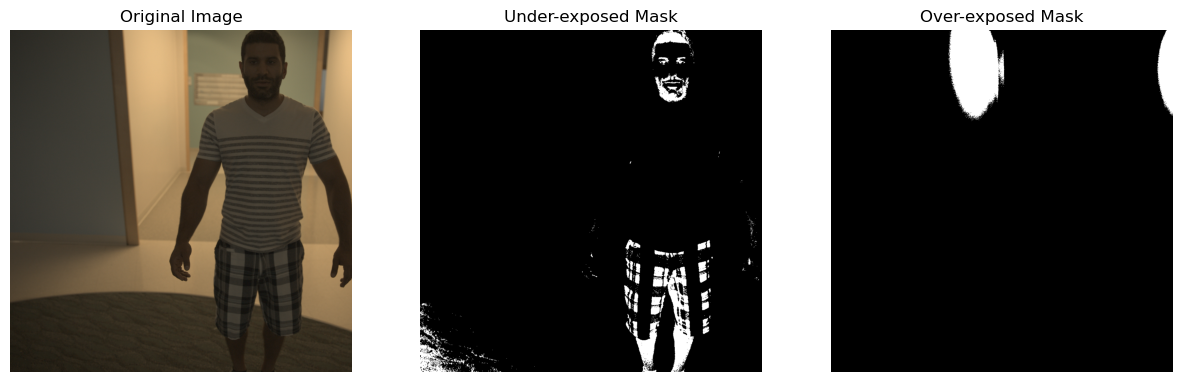

Under-exposed ratio: 4.00%
Over-exposed ratio: 4.00%


In [18]:
from hdr_mask import detect_exposure_regions

under_exposed, over_exposed = detect_exposure_regions(source,percentile=0.04)
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(source[0].permute(1,2,0).cpu().numpy())
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(under_exposed[0].cpu().numpy(), cmap='gray')
plt.title('Under-exposed Mask')
plt.axis('off')

plt.subplot(133)
plt.imshow(over_exposed[0].cpu().numpy(), cmap='gray')
plt.title('Over-exposed Mask')
plt.axis('off')

plt.show()

# Calculate mask ratios
under_ratio = under_exposed.mean().item()
over_ratio = over_exposed.mean().item()
print(f"Under-exposed ratio: {under_ratio:.2%}")
print(f"Over-exposed ratio: {over_ratio:.2%}")
